# Data mining - IMDB 5000 movie dataset

In [1]:
#this notebook is inspired from Manos Pratikakis find on kaggle 
# IMDB 5k Movies - Data mining / gradient boosting

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud
from sklearn import ensemble
from sklearn.model_selection import train_test_split

# Data presentation

In [2]:
#first action read the database
data=pd.read_csv('./movie_metadata.csv')
#explore 25 raw
data.sample(25)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4115,Color,NaN,7.0,44.0,NaN,246.0,Megan Hilty,786.0,NaN,Comedy|Drama|Horror|Sci-Fi|Thriller,...,28.0,English,USA,NaN,NaN,NaN,341.0,7.9,16.00,3000
3470,Color,Steven Soderbergh,324.0,110.0,0.0,11000.0,Alex Pettyfer,17000.0,113709992.0,Comedy|Drama,...,281.0,English,USA,R,7000000.0,2012.0,15000.0,6.1,2.35,54000
2791,Color,Alan Cohn,37.0,96.0,0.0,654.0,Linda Cardellini,3000.0,15062898.0,Comedy,...,106.0,English,USA,R,14000000.0,1998.0,2000.0,6.0,1.85,645
1839,Color,Andy Tennant,92.0,121.0,72.0,343.0,Dougray Scott,1000.0,65703412.0,Comedy|Drama|Romance,...,345.0,English,USA,PG-13,26000000.0,1998.0,794.0,7.0,2.35,0
3204,Color,Eric Blakeney,49.0,101.0,3.0,826.0,Oliver Platt,14000.0,1631839.0,Comedy|Crime|Romance,...,91.0,English,USA,R,10000000.0,2000.0,1000.0,5.7,1.85,242
3293,Color,John Landis,71.0,116.0,644.0,199.0,Denholm Elliott,392.0,90400000.0,Comedy,...,159.0,English,USA,R,NaN,1983.0,249.0,7.5,1.85,0
3314,Color,Mike Leigh,81.0,121.0,608.0,25.0,Ruth Sheen,149.0,112935.0,Drama,...,94.0,English,UK,R,9000000.0,2002.0,44.0,7.6,1.85,484
2308,Color,Mike Leigh,103.0,154.0,608.0,149.0,Dexter Fletcher,1000.0,6201757.0,Biography|Comedy|Drama|History|Music|Musical,...,202.0,English,UK,R,10000000.0,1999.0,452.0,7.4,1.66,608
4768,Color,Georgia Hilton,1.0,122.0,406.0,152.0,Tim Abell,358.0,NaN,Action|Mystery|Thriller,...,16.0,English,USA,R,NaN,2015.0,317.0,2.2,NaN,353
825,Color,Anthony Hemingway,144.0,125.0,143.0,519.0,Nate Parker,1000.0,49875589.0,Action|Adventure|Drama|History|War,...,273.0,English,USA,PG-13,58000000.0,2012.0,664.0,5.9,2.35,0


In [3]:
#get informations of database content 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [3]:
## let display the Count and mean value... for numeric attributes
data.describe(include = [np.number]) 

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [4]:
## Count number of uniques and most frequent value of non-numeric
data.describe(include = ['O']) 

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Victor Frankenstein,John Heard,based on novel,http://www.imdb.com/title/tt2638144/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


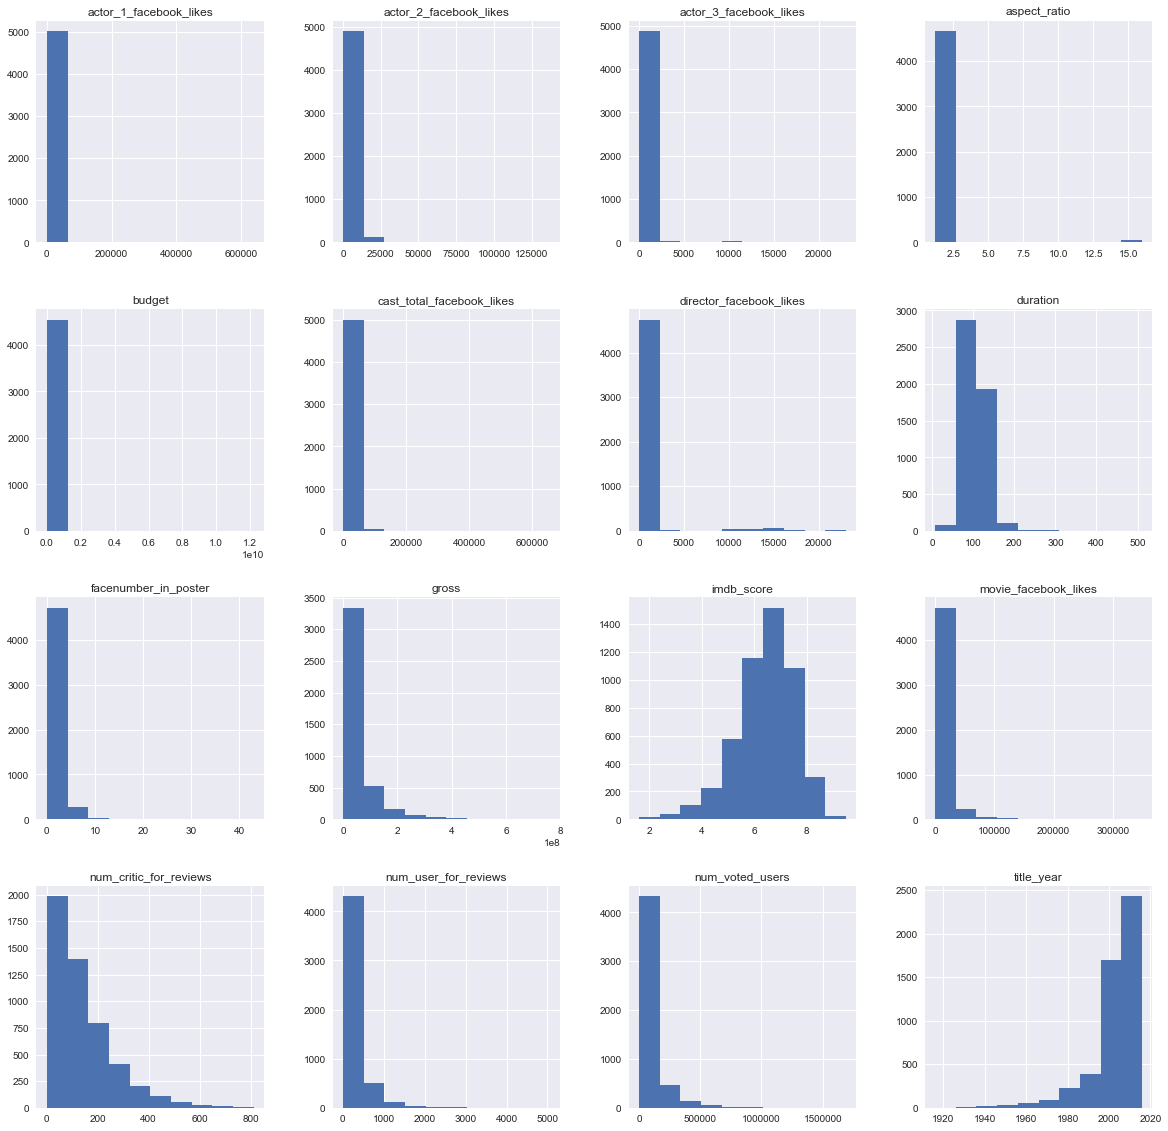

In [6]:
plt.style.use('seaborn')
data.hist(figsize=[20,20]) ##Histograms for numeric data
plt.show()

# Data pre-process

In [3]:
duplicates=data.duplicated(subset='movie_title', keep=False)
sum(duplicates) ## Number of duplicates based on movie title

245

In [6]:
#check genre if consistent 
data["genres"]


0                         Action|Adventure|Fantasy|Sci-Fi
1                                Action|Adventure|Fantasy
2                               Action|Adventure|Thriller
3                                         Action|Thriller
4                                             Documentary
5                                 Action|Adventure|Sci-Fi
6                                Action|Adventure|Romance
7       Adventure|Animation|Comedy|Family|Fantasy|Musi...
8                                 Action|Adventure|Sci-Fi
9                        Adventure|Family|Fantasy|Mystery
10                                Action|Adventure|Sci-Fi
11                                Action|Adventure|Sci-Fi
12                                       Action|Adventure
13                               Action|Adventure|Fantasy
14                               Action|Adventure|Western
15                        Action|Adventure|Fantasy|Sci-Fi
16                        Action|Adventure|Family|Fantasy
17            

In [5]:
data=data.drop_duplicates(subset='movie_title',keep='first') ##Remove duplicates,keep only first
nandata=data.isnull().sum().to_frame('Number of NaN') ## Number of missing (NaN) values
nandata

,Number of NaN
color,19
director_name,102
num_critic_for_reviews,49
duration,15
director_facebook_likes,102
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,863
genres,0


Based on the histograms, most variables are left-skewed. So I fill NaN values with either median or mode.

In [6]:
##Fill NaN with median and mode
median=data[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','num_user_for_reviews','gross','budget','actor_2_facebook_likes','movie_facebook_likes']].median()
data=data.fillna(median)
mode=data[['color','duration','facenumber_in_poster','language','country','content_rating','title_year','aspect_ratio']].mode().iloc[0]
data=data.fillna(mode)

In [7]:
##Float to int
data[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','actor_2_facebook_likes']]=data[['num_critic_for_reviews','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','facenumber_in_poster','num_user_for_reviews','title_year','actor_2_facebook_likes']].astype(int)

In [8]:
data=data.dropna() ## Remove whole indice if at least 1 NaN is seen
data.sample(20)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2295,Color,Bob Clark,32,88.0,84,177,Vanessa Angel,650,9109322.0,Comedy|Family|Sci-Fi,...,129,English,Germany,PG,20000000.0,2004,384,1.9,2.35,0
3492,Color,Michael Rymer,28,95.0,48,826,Omar Epps,1000,14003141.0,Crime|Drama|Thriller,...,29,English,USA,R,7000000.0,1999,865,6.1,2.35,375
3079,Color,Stanley Kubrick,285,161.0,0,73,Gary Lockwood,273,56715371.0,Adventure|Mystery|Sci-Fi,...,1736,English,UK,G,12000000.0,1968,117,8.3,2.20,24000
1250,Color,Colin Strause,211,102.0,25,473,Johnny Lewis,1000,41797066.0,Action|Horror|Sci-Fi|Thriller,...,998,English,USA,R,40000000.0,2007,741,4.7,2.35,0
4756,Color,Jonathan Parker,2,87.0,0,347,Joanne Whalley,584,25043962.0,Drama,...,11,English,USA,PG,19800000.0,2005,507,5.0,1.85,29
3947,Color,Anne Fontaine,141,112.0,105,748,Naomi Watts,18000,317125.0,Drama|Romance,...,87,English,Australia,R,16000000.0,2013,6000,6.2,2.35,0
168,Color,Jon M. Chu,351,122.0,209,934,Dwayne Johnson,17000,122512052.0,Action|Adventure|Sci-Fi|Thriller,...,288,English,USA,PG-13,130000000.0,2013,12000,5.8,2.35,42000
4343,Black and White,Tim Hunter,45,99.0,28,223,Daniel Roebuck,18000,4600000.0,Crime|Drama,...,111,English,USA,R,1900000.0,1986,1000,7.1,1.85,0
1278,Color,Justin Chadwick,169,115.0,56,19000,Scarlett Johansson,20000,26814957.0,Biography|Drama|History|Romance,...,252,English,UK,PG-13,35000000.0,2008,19000,6.7,1.85,0
3855,Color,Beto Gómez,16,105.0,5,122,Gerardo Taracena,274,1391770.0,Adventure|Comedy|Western,...,14,Spanish,Mexico,PG-13,19800000.0,2011,154,6.0,2.35,0


In [9]:
data.shape

(4658, 28)

# EDA - Exploratory Data Analysis

In [10]:
scatterdata=data.drop(data.columns[[0,1,5,6,9,10,11,13,14,15,16,17,19,20,21,23,24,26]], axis=1)

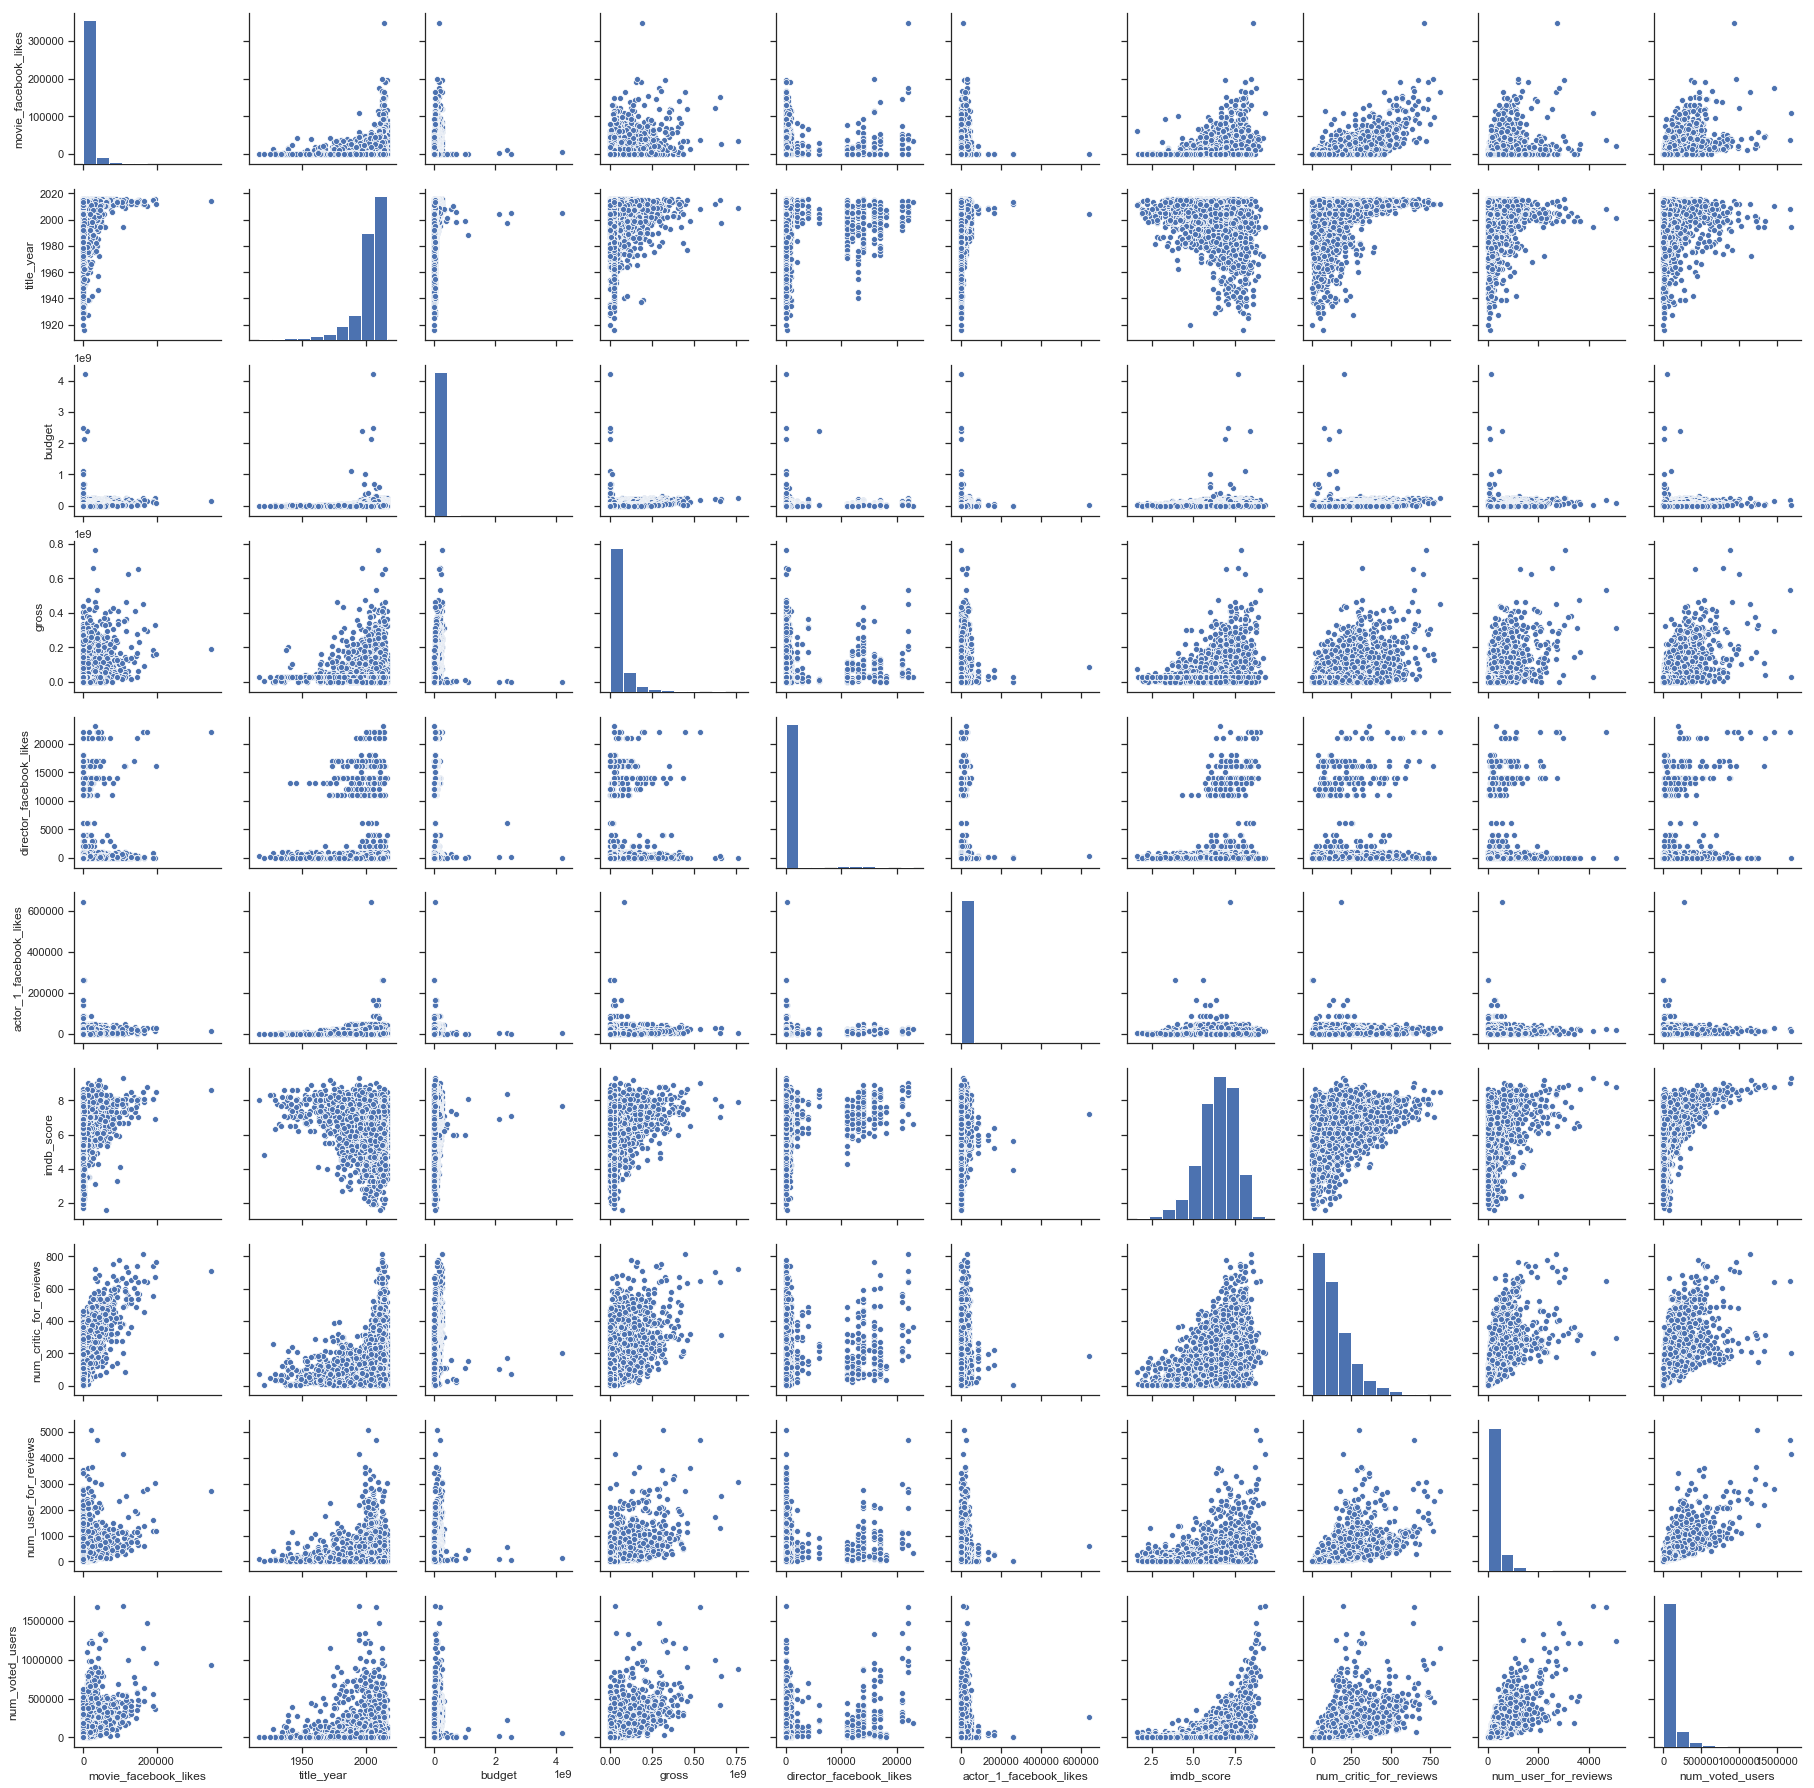

In [11]:
scatterdata=data[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes',
                  'actor_1_facebook_likes','imdb_score','num_critic_for_reviews','num_user_for_reviews','num_voted_users']]

sns.set(style="ticks")
sns.pairplot(scatterdata)

In [15]:
cor=data.corr(method='pearson')## Correlation matrix with pearson method -1 negative , 1 positive correlation
cor.style.background_gradient(cmap='Purples')
#Deeper blue color highlights higher Pearson correlation


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1,0.24266,0.183924,0.261568,0.186902,0.473268,0.618429,0.25661,-0.0277602,0.596111,0.19014,0.306789,0.273171,0.335823,0.0327654,0.690186
duration,0.24266,1,0.176697,0.126979,0.0834215,0.240112,0.336653,0.119104,0.0294528,0.344186,0.142737,-0.132806,0.132516,0.352561,0.0503984,0.214994
director_facebook_likes,0.183924,0.176697,1,0.120144,0.093072,0.141798,0.301967,0.120899,-0.0406257,0.226951,0.0447114,-0.0638299,0.117062,0.18036,0.00110295,0.164565
actor_3_facebook_likes,0.261568,0.126979,0.120144,1,0.251102,0.291906,0.274316,0.472386,0.104018,0.222,0.10127,0.101417,0.547922,0.0592276,0.0147286,0.269684
actor_1_facebook_likes,0.186902,0.0834215,0.093072,0.251102,1,0.150225,0.190275,0.951598,0.0711813,0.143587,0.0556981,0.0928596,0.395835,0.0779813,0.0146056,0.132809
gross,0.473268,0.240112,0.141798,0.291906,0.150225,1,0.635593,0.234462,-0.0236538,0.56036,0.236457,0.0461771,0.254294,0.18763,0.0168428,0.371436
num_voted_users,0.618429,0.336653,0.301967,0.274316,0.190275,0.635593,1,0.25801,-0.0267794,0.799107,0.164608,0.0200443,0.2576,0.435065,0.0121536,0.535368
cast_total_facebook_likes,0.25661,0.119104,0.120899,0.472386,0.951598,0.234462,0.25801,1,0.0914912,0.201509,0.0841978,0.118391,0.633052,0.0895097,0.018799,0.204031
facenumber_in_poster,-0.0277602,0.0294528,-0.0406257,0.104018,0.0711813,-0.0236538,-0.0267794,0.0914912,1,-0.0660276,-0.021369,0.0572491,0.0750041,-0.0639586,0.00764783,0.00564534
num_user_for_reviews,0.596111,0.344186,0.226951,0.222,0.143587,0.56036,0.799107,0.201509,-0.0660276,1,0.168995,0.0117129,0.210328,0.311642,0.00868528,0.40217


# Features of movies that are popular with the public

I cluster movies based on attributes that show social impact, such as movie_facebook_likes , num_user_for_reviews , num_critic_for_reviews and num_voted_users.

In [9]:
data['actors_facebook_likes']=data['actor_1_facebook_likes']+data['actor_2_facebook_likes']+data['actor_3_facebook_likes']
kmeansdata= data[['movie_facebook_likes','num_user_for_reviews','num_critic_for_reviews','num_voted_users']]

In [17]:
## Best silhouette score for given data
n_clusters = list(range(2, 11))
scores = []
for i in n_clusters:
    model = KMeans(n_clusters=i,random_state=0)
    model.fit(kmeansdata)
    results=model.labels_
    scores.append(silhouette_score(kmeansdata,results))

In [18]:
scores

[0.7916290666711893,
 0.7127015046184016,
 0.6789417360926422,
 0.63155935438623,
 0.6150785480655024,
 0.5980135809876367,
 0.573884788656048,
 0.5548289230033523,
 0.5389793699567049]

In [19]:
##Kmeans-3 cluster
model = KMeans(n_clusters=3,random_state=0)
model.fit(kmeansdata)
results=model.labels_
score=silhouette_score(kmeansdata,results)
print("For n_clusters = 3 the average silhouette_score is :", score)
results=pd.Series(data=results,index=data.index)
results=results.to_frame("clusters")
data=data.join(results)

For n_clusters = 3 the average silhouette_score is : 0.7127015046184016


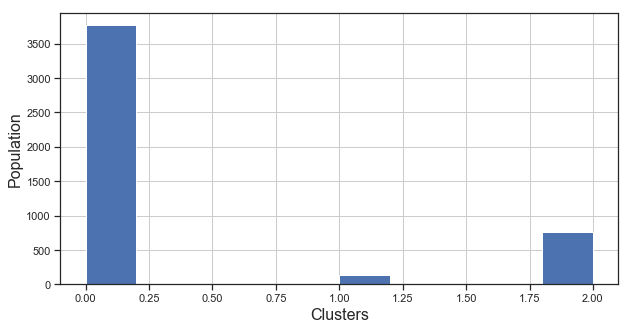

In [20]:
plt.ylabel('Population',fontsize=16)
plt.xlabel('Clusters',fontsize=16)
data['clusters'].hist(figsize=(10,5))
plt.show()

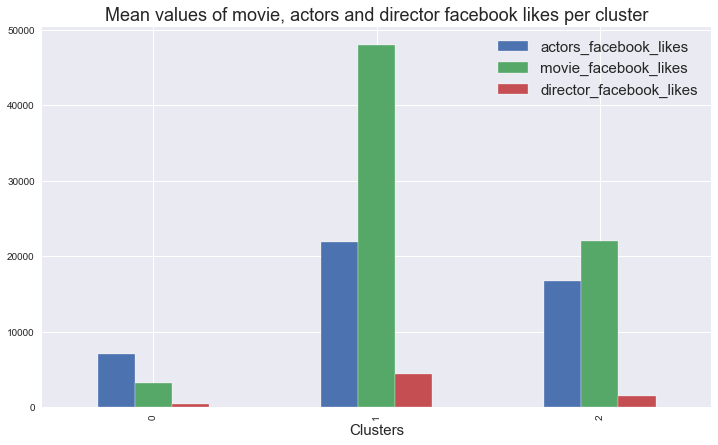

In [22]:
plt.style.use('seaborn')
data[['actors_facebook_likes','movie_facebook_likes','director_facebook_likes']].groupby(data['clusters']).mean().plot.bar(stacked=False,figsize=(12,7))
plt.xlabel('Clusters',fontsize=15)
plt.legend(loc=0, prop={'size': 15})
plt.title('Mean values of movie, actors and director facebook likes per cluster',fontsize=18)
plt.show()

Movies cluster with most Facebook likes also has high average actors Facebook likes. We can assume that, to a high extent, for the audience to like a film, the actors must first be liked and then the director.

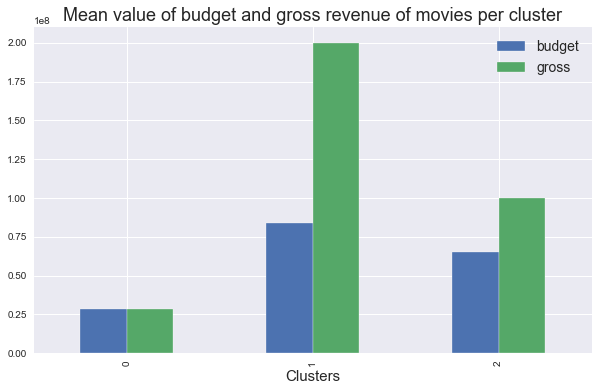

In [23]:
plt.style.use('seaborn')
data[['budget','gross']].groupby(data['clusters']).mean().plot.bar(stacked=False,figsize=(10,6))
plt.legend(loc=0, prop={'size': 14})
plt.xlabel('Clusters',fontsize=15)
plt.title('Mean value of budget and gross revenue of movies per cluster',fontsize=18)
plt.show()

Cluster 0 where movies have a low number of Facebook likes, we also see that budget is equal to gross revenue. So likes on Facebook definitely play a part in the financial success of each movie.

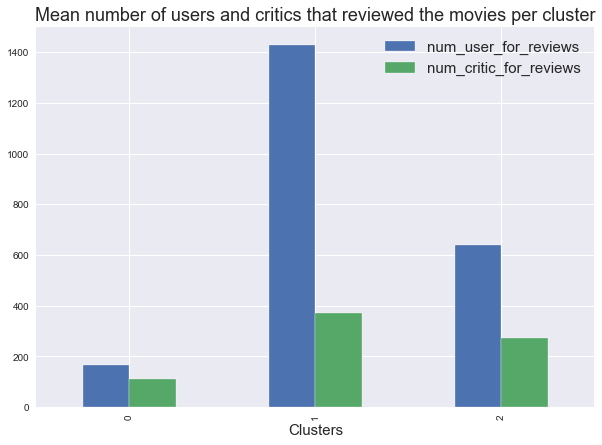

In [24]:
data[['num_user_for_reviews','num_critic_for_reviews']].groupby(data['clusters']).mean().plot.bar(stacked=False,figsize=(10,7))
plt.legend(loc=0, prop={'size': 15})
plt.xlabel('Clusters',fontsize=15)
plt.title('Mean number of users and critics that reviewed the movies per cluster',fontsize=18)
plt.show()

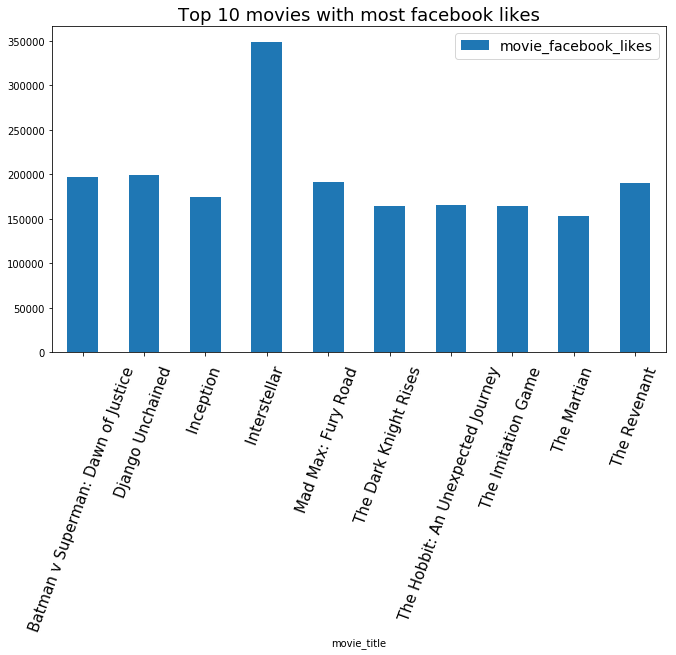

In [10]:
##Sort movies based on facebook_likes and get top 10
sorted_fl=data.sort_values(by="movie_facebook_likes",ascending=False)
top10fl=sorted_fl.head(10)
top10fl[['movie_facebook_likes']].groupby(top10fl['movie_title']).sum().plot.bar(stacked=True,figsize=(11,6))
plt.xticks(rotation=70,fontsize=15)

plt.legend(loc=0,  prop={'size': 14})
plt.title('Top 10 movies with most facebook likes',fontsize=18)
plt.show()

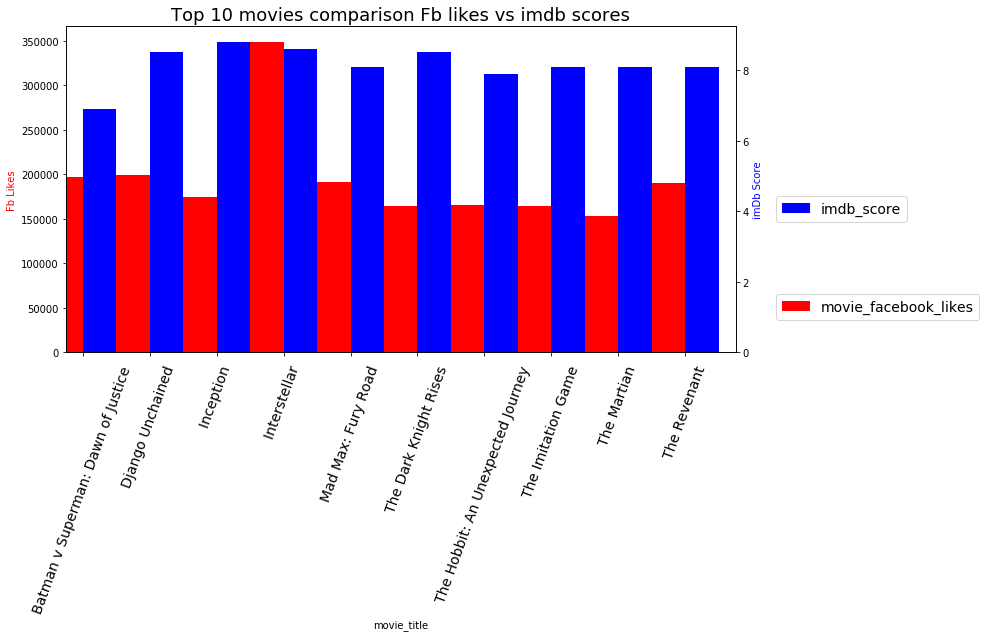

In [17]:
##Sort movies based on imdb_score and get top 10
sorted_is=data.sort_values(by="movie_facebook_likes",ascending=False)
top10is=sorted_is.head(10)


ax = top10is[['movie_facebook_likes']].groupby(top10is['movie_title']).sum().plot.bar(stacked=True,color='red',figsize=(12,6), position=1)
plt.xticks(rotation=70,fontsize=14)
ax.legend(loc=2, bbox_to_anchor=(1.05, 0.2), prop={'size': 14})

ax2 = plt.twinx() # Create another axes that shares the same x-axis as ax.
top10is[['imdb_score']].groupby(top10is['movie_title']).sum().plot.bar(stacked=True,color='blue', ax=ax2,figsize=(12,6), position=0)

ax.set_ylabel('Fb Likes', color='red')
ax2.set_ylabel('imDb Score', color='blue')


plt.legend(loc=2, bbox_to_anchor=(1.05, 0.5), prop={'size': 14}, shadow=False, fancybox=True)


plt.title('Top 10 movies comparison Fb likes vs imdb scores',fontsize=18)
plt.show()



In [49]:
#explore informations about movie whitch have the highest scores imdb and most facebook likes
sorted_is.loc[sorted_is['movie_title'] == 'Inception\xa0']

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,actors_facebook_likes
97,Color,Christopher Nolan,642,148.0,22000,23000,Tom Hardy,29000,292568851.0,Action|Adventure|Sci-Fi|Thriller,...,English,USA,PG-13,160000000.0,2010,27000,8.8,2.35,175000,79000


In [48]:
#what are the genres of top movie
sorted_is.genres[97]

'Action|Adventure|Sci-Fi|Thriller'

# Data preparation for wordcloud in order to display top 20 movies

In [76]:
check_is = data[['movie_title', 'imdb_score','movie_facebook_likes']].sort_values(by="imdb_score",ascending=False)
#check_is

# $ Plot $ movie title $ of $ top $ 20 $ movies $ with $ most $ facebook $ likes

In [82]:
movie_fl=sorted_fl["movie_title"].head(20)


In [83]:
movie_fl = movie_fl.replace({' ':'_'}, regex=True)
movie_fl = movie_fl.replace({',':''}, regex=True)

In [84]:
movie_fl=pd.Series('/'.join(movie_fl).split("|"))#.lower()
movie_fl = movie_fl.replace({':':''}, regex=True)

In [85]:
print(movie_fl)

0    Interstellar /Django_Unchained /Batman_v_Super...
dtype: object


In [86]:
def make_cloud(cloud_data):
    #cloud_data=cloud_data.str.lower()
    cloud_list=list(cloud_data) 
    unique_string=(" ").join(cloud_list)
    wordcloud = WordCloud(width = 1000, height = 500,max_words=100).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()    
    return unique_string

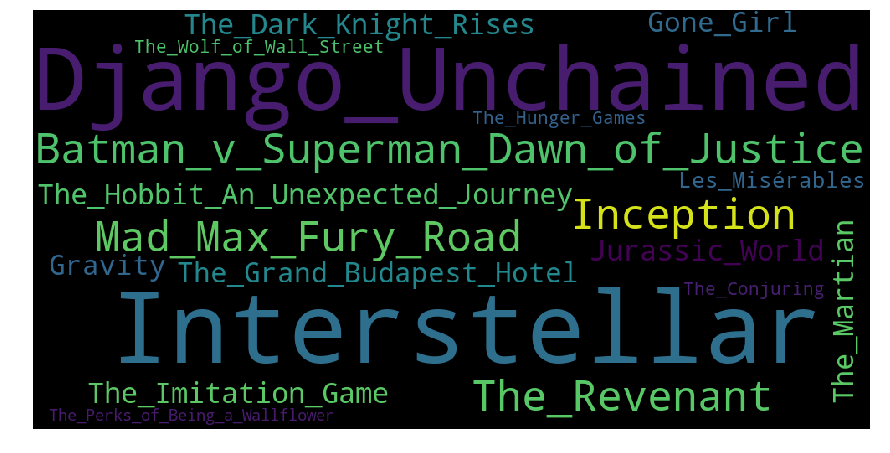

In [87]:
movie_string = make_cloud(movie_fl)

In [93]:
movie_string

'Interstellar\xa0/Django_Unchained\xa0/Batman_v_Superman_Dawn_of_Justice\xa0/Mad_Max_Fury_Road\xa0/The_Revenant\xa0/Inception\xa0/The_Hobbit_An_Unexpected_Journey\xa0/The_Imitation_Game\xa0/The_Dark_Knight_Rises\xa0/The_Martian\xa0/Jurassic_World\xa0/The_Grand_Budapest_Hotel\xa0/Her\xa0/Gravity\xa0/Gone_Girl\xa0/Les_Misérables\xa0/The_Hunger_Games\xa0/The_Wolf_of_Wall_Street\xa0/The_Conjuring\xa0/The_Perks_of_Being_a_Wallflower\xa0'

In [88]:
top_movie_title_is=check_is["movie_title"].head(20)

In [89]:
def make_cloud_mt(cloud_data):
    #cloud_data=cloud_data.str.lower()
    
    cloud_data.replace({' ':'_'}, regex=True)
    cloud_data.replace({',':''}, regex=True)
    cloud_data=pd.Series('/'.join(keywords).split("|"))
    cloud_data= keywords.replace({':':''}, regex=True)
    
    cloud_list=list(cloud_data) 
    unique_string=(" ").join(cloud_list)
    wordcloud = WordCloud(width = 1000, height = 500,max_words=100).generate(unique_string)
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()    
    return unique_string

# $ Plot $ movie title $ of $ top $ 20 $ movies $ with $ highest $ imDb $ scores

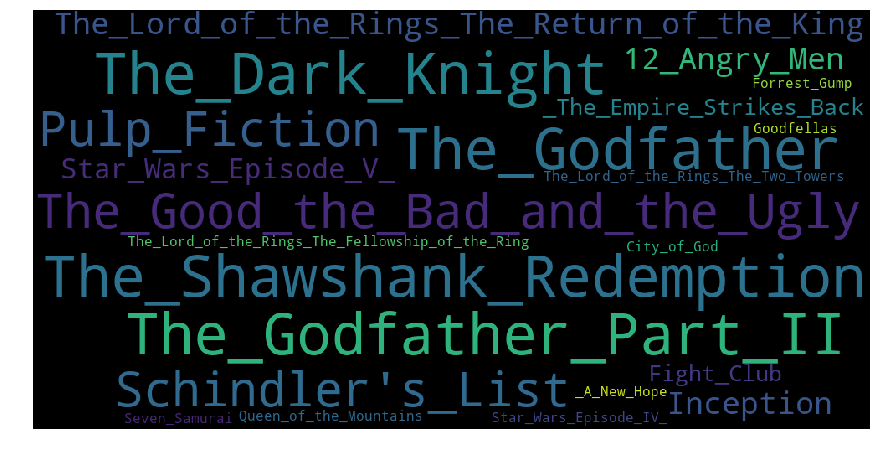

In [91]:
unique_string = make_cloud_mt(keywords)

In [92]:
unique_string

"The_Shawshank_Redemption\xa0/The_Godfather\xa0/The_Godfather_Part_II\xa0/The_Dark_Knight\xa0/The_Good_the_Bad_and_the_Ugly\xa0/Schindler's_List\xa0/Pulp_Fiction\xa0/The_Lord_of_the_Rings_The_Return_of_the_King\xa0/12_Angry_Men\xa0/Inception\xa0/Star_Wars_Episode_V_-_The_Empire_Strikes_Back\xa0/Fight_Club\xa0/The_Lord_of_the_Rings_The_Fellowship_of_the_Ring\xa0/Forrest_Gump\xa0/Seven_Samurai\xa0/Star_Wars_Episode_IV_-_A_New_Hope\xa0/The_Lord_of_the_Rings_The_Two_Towers\xa0/City_of_God\xa0/Queen_of_the_Mountains\xa0/Goodfellas\xa0"

In [51]:
genres=sorted_fl["genres"].head(200)
count=pd.Series('/'.join(genres).lower().split("|")).value_counts()[:10]
count.to_frame('Count')

,Count
adventure,50
drama,47
sci-fi,21
comedy,20
thriller/action,19
sci-fi/action,18
fantasy,17
mystery,15
crime,14
romance/action,10


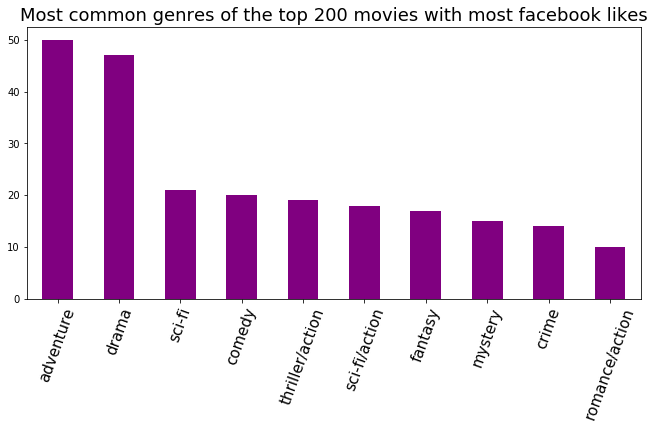

In [52]:
plot2=count.plot(x='Genres',kind='bar',color='purple',figsize=(11,5))
plt.title('Most common genres of the top 200 movies with most facebook likes',fontsize=18)
plt.xticks(rotation=70,fontsize=15)
plt.show()

In [56]:
content=sorted_fl["content_rating"].head(200)
count=pd.Series(' '.join(content).lower().split(" ")).value_counts()[:5]
print("Most common ratings of top 200 movies with most facebook likes are:\n",count.to_frame('Count')/2)

Most common ratings of top 200 movies with most facebook likes are:
        Count
pg-13   48.5
r       42.5
pg       7.0
g        1.0
rated    0.5


So we see that the movies that most people like are either adventure or drama, they have keywords such as future/relationship/battle/female/drug/war, etc., and from these the most (48.5%) are marked with pg-13 (Parental Guidance - Some material may be inappropriate for children under 13). Surprinsigly r (Rated R: Restricted – Under 17 requires accompanying parent or adult guardian) is really close - 42.5 %.

# Gradient Boosting Regression to predict imdb score

In [33]:
x=data[['movie_facebook_likes','title_year','budget','gross','director_facebook_likes','actors_facebook_likes']]
y=data['imdb_score']

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.4,random_state=13) ##Split train and test set. Test set is 40% of whole data

We create the model with

+ **Number of trees** (weak learners) = 200
+ **Function to minimize errors** = Minimal squares
+ **Learning rate** , ie the rate at which the contribution of each tree is reduced= 3%
+ **Maximum height** of trees= 4

In [35]:
n_trees=200
model=ensemble.GradientBoostingRegressor(loss='ls',learning_rate=0.03,n_estimators=n_trees,max_depth=4)
model.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.03, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=200,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [36]:
pred=model.predict(x_test)
error=model.loss_(y_test,pred) ##Loss function== Mean square error
print("MSE:%.3f" % error)

MSE:0.658


In [37]:
test_error=[]
for i,pred in enumerate(model.staged_predict(x_test)):##staged_predict=predict at each stage 
    test_error.append(model.loss_(y_test,pred))##model.loss(y_test,pred)=mse(y_test,pred)

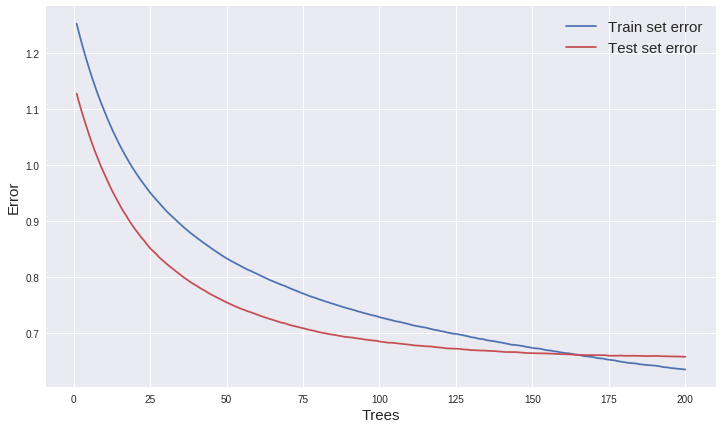

In [38]:
plt.figure(figsize=(12,7))
plt.plot(list(range(1,n_trees+1)),model.train_score_,'b-',label='Train set error') ## model.train_score_=deviance(=loss) of model at each stage
plt.plot(list(range(1,n_trees+1)),test_error,'r-',label='Test set error')
plt.legend(loc='upper right',fontsize=15)
plt.xlabel('Trees',fontsize=15)
plt.ylabel('Error', fontsize=15)
plt.show()

We see that the error for the train and test set follows a similar behavior, so we have created a pretty good model. After the 200 trees, we would see that the train error will continue to decrease while the test error will remain stable. This would mean that the model is overfitting to the train set, reducing the error for train set but not getting a smaller error in the test set as well.

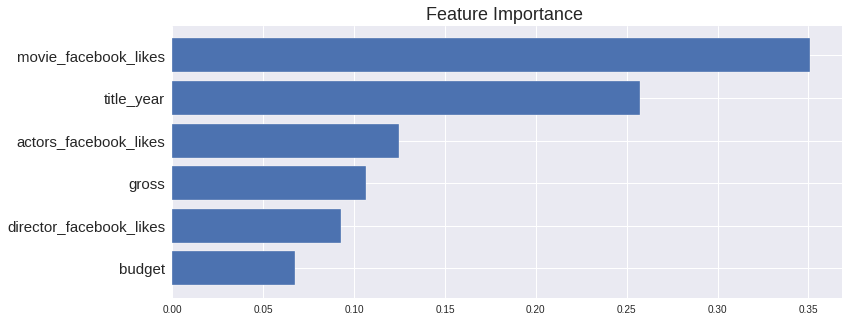

In [39]:
feature_importance=model.feature_importances_
sorted_importance = np.argsort(feature_importance)
pos=np.arange(len(sorted_importance))
plt.figure(figsize=(12,5))
plt.barh(pos, feature_importance[sorted_importance],align='center')
plt.yticks(pos, x.columns[sorted_importance],fontsize=15)
plt.title('Feature Importance ',fontsize=18)
plt.show()

Calculating each feature importance in defining the imdb score, we see that movie facebook likes is the attribute that has the higest importance in defining an imdb score. Suprisingly, the title year ie the year the movie was released is also an important factor.